In [245]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [246]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [247]:
data = pd.read_csv("adult_dataset-1.csv")

In [248]:
data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [249]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [250]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [251]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [252]:
data['age'].unique()

array([90, 82, 66, 54, 41, 34, 38, 74, 68, 45, 52, 32, 51, 46, 57, 22, 37,
       29, 61, 21, 33, 49, 23, 59, 60, 63, 53, 44, 43, 71, 48, 73, 67, 40,
       50, 42, 39, 55, 47, 31, 58, 62, 36, 72, 78, 83, 26, 70, 27, 35, 81,
       65, 25, 28, 56, 69, 20, 30, 24, 64, 75, 19, 77, 80, 18, 17, 76, 79,
       88, 84, 85, 86, 87], dtype=int64)

In [253]:
data['age'].value_counts()

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: age, Length: 73, dtype: int64

In [254]:
data['workclass'].unique()

array(['?', 'Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

In [255]:
data[data['workclass'] == '?']

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
14,51,?,172175,Doctorate,16,Never-married,?,Not-in-family,White,Male,0,2824,40,United-States,>50K
24,61,?,135285,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,2603,32,United-States,<=50K
44,71,?,100820,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,2489,15,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32533,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32534,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32541,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32543,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [256]:
wc=data[data['workclass'] == '?'].index

In [257]:
data[data['workclass'] == '?'].index

Int64Index([    0,     2,    14,    24,    44,    48,    49,    76,   114,
              133,
            ...
            32440, 32483, 32496, 32500, 32528, 32533, 32534, 32541, 32543,
            32544],
           dtype='int64', length=1836)

In [258]:
data.drop(wc,axis = 0, inplace = True)

In [259]:
data['fnlwgt'].unique()

array([132870, 140359, 264663, ...,  84661, 257302, 201490], dtype=int64)

In [260]:
data['fnlwgt'].value_counts

<bound method IndexOpsMixin.value_counts of 1        132870
3        140359
4        264663
5        216864
6        150601
          ...  
32556    310152
32557    257302
32558    154374
32559    151910
32560    201490
Name: fnlwgt, Length: 30725, dtype: int64>

In [261]:
data['education'].unique()

array(['HS-grad', '7th-8th', 'Some-college', '10th', 'Doctorate',
       'Prof-school', 'Bachelors', 'Masters', '11th', 'Assoc-acdm',
       'Assoc-voc', '1st-4th', '5th-6th', '12th', '9th', 'Preschool'],
      dtype=object)

In [262]:
data['education.num'].unique()

array([ 9,  4, 10,  6, 16, 15, 13, 14,  7, 12, 11,  2,  3,  8,  5,  1],
      dtype=int64)

In [263]:
data['marital.status'].unique()

array(['Widowed', 'Divorced', 'Separated', 'Never-married',
       'Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [264]:
data['occupation'].unique()

array(['Exec-managerial', 'Machine-op-inspct', 'Prof-specialty',
       'Other-service', 'Adm-clerical', 'Craft-repair',
       'Transport-moving', 'Handlers-cleaners', 'Sales',
       'Farming-fishing', 'Tech-support', 'Protective-serv',
       'Armed-Forces', 'Priv-house-serv', '?'], dtype=object)

In [266]:
oc = data[data['occupation'] == '?'].index

In [267]:
data.drop(oc,axis = 0, inplace = True)

In [268]:
data['occupation'].unique()

array(['Exec-managerial', 'Machine-op-inspct', 'Prof-specialty',
       'Other-service', 'Adm-clerical', 'Craft-repair',
       'Transport-moving', 'Handlers-cleaners', 'Sales',
       'Farming-fishing', 'Tech-support', 'Protective-serv',
       'Armed-Forces', 'Priv-house-serv'], dtype=object)

In [269]:
data['relationship'].unique()

array(['Not-in-family', 'Unmarried', 'Own-child', 'Other-relative',
       'Husband', 'Wife'], dtype=object)

In [270]:
data['race'].unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Other',
       'Amer-Indian-Eskimo'], dtype=object)

In [271]:
data['sex'].unique()

array(['Female', 'Male'], dtype=object)

In [272]:
data['capital.gain'].unique()

array([    0, 99999, 41310, 34095, 27828, 25236, 25124, 22040, 20051,
       18481, 15831, 15024, 15020, 14344, 14084, 13550, 11678, 10605,
       10566, 10520,  9562,  9386,  8614,  7978,  7896,  7688,  7443,
        7430,  7298,  6849,  6767,  6723,  6514,  6497,  6418,  6360,
        6097,  5721,  5556,  5455,  5178,  5060,  5013,  4934,  4931,
        4865,  4787,  4687,  4650,  4508,  4416,  4386,  4101,  4064,
        3942,  3908,  3887,  3818,  3781,  3674,  3471,  3464,  3456,
        3432,  3418,  3411,  3325,  3273,  3137,  3103,  2993,  2977,
        2964,  2961,  2936,  2907,  2885,  2829,  2653,  2635,  2597,
        2580,  2538,  2463,  2414,  2407,  2387,  2354,  2346,  2329,
        2290,  2228,  2202,  2176,  2174,  2105,  2062,  2050,  2036,
        2009,  1848,  1831,  1797,  1639,  1506,  1471,  1455,  1424,
        1409,  1173,  1151,  1086,  1055,   991,   914,   594,   401,
         114], dtype=int64)

In [273]:
data['capital.loss'].unique()

array([4356, 3900, 3770, 3683, 3004, 2824, 2754, 2603, 2559, 2547, 2472,
       2467, 2457, 2444, 2415, 2392, 2377, 2352, 2339, 2282, 2267, 2258,
       2246, 2238, 2231, 2206, 2205, 2201, 2179, 2174, 2149, 2129, 2080,
       2057, 2051, 2042, 2002, 2001, 1980, 1977, 1974, 1944, 1902, 1887,
       1876, 1848, 1844, 1825, 1816, 1762, 1755, 1741, 1740, 1735, 1726,
       1721, 1719, 1672, 1669, 1668, 1651, 1648, 1628, 1617, 1602, 1594,
       1590, 1579, 1573, 1564, 1539, 1504, 1485, 1411, 1408, 1380, 1340,
       1258, 1138, 1092,  974,  880,  810,  653,  625,  419,  323,  213,
        155,    0], dtype=int64)

In [274]:
data['hours.per.week'].unique()

array([18, 40, 45, 20, 60, 35, 55, 76, 50, 42, 25, 32, 90, 48, 70, 52, 72,
       39,  6, 65, 80, 67, 99, 30, 75, 12, 26, 10, 84, 38, 62, 44,  8, 28,
       59,  5, 24, 57, 34, 37, 46, 56, 41, 98, 43, 15, 63,  1, 36, 47, 68,
       54,  2, 16,  9,  3,  4, 33, 23, 22, 64, 51, 19, 58, 53, 96, 66, 21,
        7, 13, 27, 14, 77, 31, 78, 11, 49, 17, 85, 87, 88, 73, 89, 97, 94,
       29, 82, 86, 91, 81, 92, 61, 74, 95], dtype=int64)

In [275]:
data['native.country'].unique()

array(['United-States', '?', 'Mexico', 'Greece', 'Vietnam', 'China',
       'Taiwan', 'India', 'Philippines', 'Trinadad&Tobago', 'Canada',
       'South', 'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran',
       'England', 'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba',
       'Ireland', 'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic',
       'Haiti', 'Hungary', 'Columbia', 'Guatemala', 'El-Salvador',
       'Jamaica', 'Ecuador', 'France', 'Yugoslavia', 'Portugal', 'Laos',
       'Thailand', 'Outlying-US(Guam-USVI-etc)', 'Scotland'], dtype=object)

In [276]:
nc = data[data['native.country'] == '?'].index

In [277]:
data.drop(nc, axis= 0, inplace = True)

In [278]:
data['native.country'].unique()

array(['United-States', 'Mexico', 'Greece', 'Vietnam', 'China', 'Taiwan',
       'India', 'Philippines', 'Trinadad&Tobago', 'Canada', 'South',
       'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran', 'England',
       'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba', 'Ireland',
       'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic', 'Haiti',
       'Hungary', 'Columbia', 'Guatemala', 'El-Salvador', 'Jamaica',
       'Ecuador', 'France', 'Yugoslavia', 'Portugal', 'Laos', 'Thailand',
       'Outlying-US(Guam-USVI-etc)', 'Scotland'], dtype=object)

In [279]:
data['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [280]:
def income(a):
    if a == '>50K':
        return 1
    else:
        return 0

In [281]:
data['income'] = data['income'].apply(lambda a: income(a))

In [282]:
data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,0
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,0
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0


In [283]:
data['income'].unique()

array([0, 1], dtype=int64)

In [284]:
data['income'].value_counts()

0    22654
1     7508
Name: income, dtype: int64

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education.num   30162 non-null  int64 
 5   marital.status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital.gain    30162 non-null  int64 
 11  capital.loss    30162 non-null  int64 
 12  hours.per.week  30162 non-null  int64 
 13  native.country  30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [285]:
dup = data[data.duplicated()].index

In [286]:
data.drop(dup,axis = 0, inplace = True)

In [287]:
data[data.duplicated()]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income


In [288]:
data_n = data.drop(['age','fnlwgt','education.num','race','native.country','income'], axis = 1)

In [289]:
data_n

,workclass,education,marital.status,occupation,relationship,sex,capital.gain,capital.loss,hours.per.week
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,Female,0,4356,18
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,Female,0,3900,40
4,Private,Some-college,Separated,Prof-specialty,Own-child,Female,0,3900,40
5,Private,HS-grad,Divorced,Other-service,Unmarried,Female,0,3770,45
6,Private,10th,Separated,Adm-clerical,Unmarried,Male,0,3770,40
...,...,...,...,...,...,...,...,...,...
32556,Private,Some-college,Never-married,Protective-serv,Not-in-family,Male,0,0,40
32557,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,Female,0,0,38
32558,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,Male,0,0,40
32559,Private,HS-grad,Widowed,Adm-clerical,Unmarried,Female,0,0,40


In [290]:
data_n.isnull().sum()

workclass         0
education         0
marital.status    0
occupation        0
relationship      0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
dtype: int64

In [291]:
data_n.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30139 entries, 1 to 32560
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   workclass       30139 non-null  object
 1   education       30139 non-null  object
 2   marital.status  30139 non-null  object
 3   occupation      30139 non-null  object
 4   relationship    30139 non-null  object
 5   sex             30139 non-null  object
 6   capital.gain    30139 non-null  int64 
 7   capital.loss    30139 non-null  int64 
 8   hours.per.week  30139 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 2.3+ MB


In [292]:
df = pd.get_dummies(data_n)

In [294]:
df

,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,...,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,sex_Female,sex_Male
1,0,4356,18,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,3900,40,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,0,3900,40,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
5,0,3770,45,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
6,0,3770,40,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0,0,40,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
32557,0,0,38,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
32558,0,0,40,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
32559,0,0,40,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [295]:
data_n.columns

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'sex', 'capital.gain', 'capital.loss',
       'hours.per.week'],
      dtype='object')

<AxesSubplot:ylabel='age'>

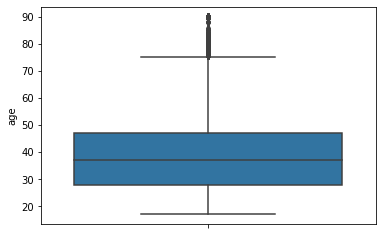

In [296]:
sns.boxplot(y = data['age'])

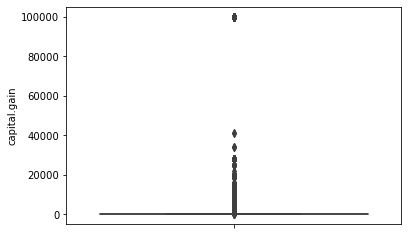

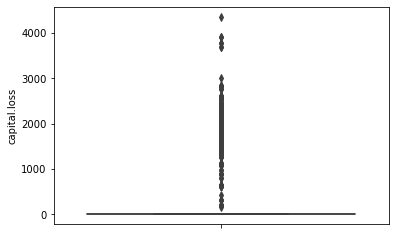

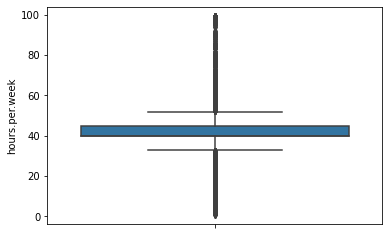

In [297]:
col=['capital.gain', 'capital.loss','hours.per.week']
for c in col:
  percentile25 =data_n[c].quantile(0.25)
  percentile75 =data_n[c].quantile(0.75)
  iqr=percentile75-percentile25
  upper_limit=percentile75+(1.5*iqr)
  lower_limit=percentile25-(1.5*iqr)
  data_n=data_n[(data_n[c]<upper_limit) & (data_n[c]>lower_limit)]
  plt.figure()
  sns.boxplot(y=c, data=df)

In [298]:
x= df.values
y = data['income'].values

In [299]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y, test_size = .3,random_state = 42)

In [300]:
ss = StandardScaler()

In [301]:
X_train = ss.fit_transform(X_train)

In [302]:
X_test = ss.transform(X_test)

## Logistic Regression

In [303]:
from sklearn.linear_model import LogisticRegression

In [304]:
classifier = LogisticRegression()

In [305]:
classifier.fit(X_train,Y_train)

LogisticRegression()

In [306]:
Y_pred = classifier.predict(X_test)

In [307]:
Y_tain_pred = classifier.predict(X_train)

In [308]:
## 60% threshhold
Y1_pred = (classifier.predict_proba(X_test)[:,1] >=.6).astype(int)

In [309]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, Y_pred)

array([[6314,  506],
       [ 895, 1327]], dtype=int64)

In [310]:
## for 60% threshold
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, Y1_pred)

array([[6494,  326],
       [1088, 1134]], dtype=int64)

<AxesSubplot:>

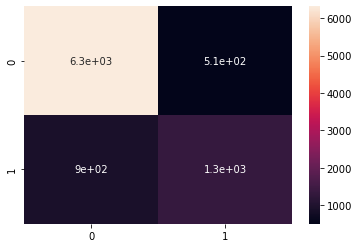

In [311]:
sns.heatmap(confusion_matrix(Y_test, Y_pred), annot = True)

<AxesSubplot:>

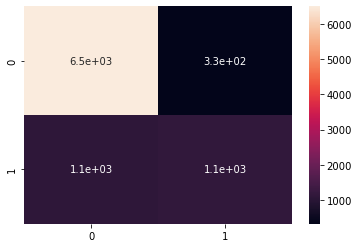

In [312]:
## 60% threshold
sns.heatmap(confusion_matrix(Y_test, Y1_pred), annot = True)

In [313]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)

0.845056403450564

In [314]:
##training accuracy
from sklearn.metrics import accuracy_score
accuracy_score(Y_train, Y_tain_pred)

0.8476086647390624

In [315]:
## testing accuracy for 60% threshold
accuracy_score(Y_test, Y1_pred)

0.8436186684361867

In [316]:
#threshold = 50
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      6820
           1       0.72      0.60      0.65      2222

    accuracy                           0.85      9042
   macro avg       0.80      0.76      0.78      9042
weighted avg       0.84      0.85      0.84      9042



In [317]:
#threshold = 60
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y1_pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      6820
           1       0.78      0.51      0.62      2222

    accuracy                           0.84      9042
   macro avg       0.82      0.73      0.76      9042
weighted avg       0.84      0.84      0.83      9042



In [318]:
## training metrics
from sklearn.metrics import classification_report
print(classification_report(Y_train, Y_tain_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     15813
           1       0.75      0.60      0.66      5284

    accuracy                           0.85     21097
   macro avg       0.81      0.76      0.78     21097
weighted avg       0.84      0.85      0.84     21097



## Decesion Tree

In [319]:
x1 = df.values
y1 = data['income'].values

In [320]:
x1_train,x1_test,y1_train,y1_test =train_test_split(x1,y1, test_size = .2, random_state = 42)

In [321]:
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier()

In [322]:
dc.fit(x1_train,y1_train)

DecisionTreeClassifier()

In [323]:
y1_pred = dc.predict(x1_test)

In [324]:
y1_train_pred = dc.predict(x1_train)

In [325]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y1_test, y1_pred)

array([[4162,  418],
       [ 562,  886]], dtype=int64)

<AxesSubplot:>

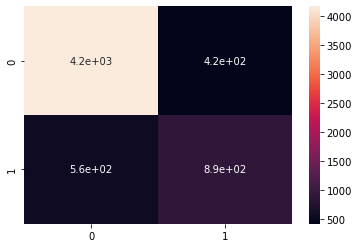

In [326]:
## testing matrix
sns.heatmap(confusion_matrix(y1_test, y1_pred), annot = True)

In [327]:
confusion_matrix(y1_train, y1_train_pred)

array([[17438,   615],
       [ 1460,  4598]], dtype=int64)

<AxesSubplot:>

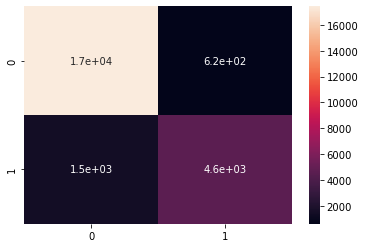

In [328]:
## training matrix
sns.heatmap(confusion_matrix(y1_train, y1_train_pred), annot = True)

In [329]:
## testing accuracy
accuracy_score(y1_test, y1_pred)

0.8374253483742535

In [330]:
##training accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y1_train, y1_train_pred)

0.913939695574634

In [331]:
## for testing data
from sklearn.metrics import classification_report
print(classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89      4580
           1       0.68      0.61      0.64      1448

    accuracy                           0.84      6028
   macro avg       0.78      0.76      0.77      6028
weighted avg       0.83      0.84      0.83      6028



In [332]:
## for training data
from sklearn.metrics import classification_report
print(classification_report(y1_train, y1_train_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94     18053
           1       0.88      0.76      0.82      6058

    accuracy                           0.91     24111
   macro avg       0.90      0.86      0.88     24111
weighted avg       0.91      0.91      0.91     24111



## Random Forest

In [333]:
from sklearn.ensemble import RandomForestClassifier

In [334]:
rfs = RandomForestClassifier()

In [335]:
rfs.fit(x1_train,y1_train)

RandomForestClassifier()

In [336]:
y_rfd_pred = rfs.predict(x1_test)

In [337]:
y_rf_train_pred = rfs.predict(x1_train)

In [338]:
## testing accuracy
accuracy_score(y1_test, y_rfd_pred)

0.8435633709356337

In [339]:
##training accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y1_train, y_rf_train_pred)

0.913939695574634

In [340]:
## for testing data
from sklearn.metrics import classification_report
print(classification_report(y1_test, y_rfd_pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.90      4580
           1       0.69      0.62      0.66      1448

    accuracy                           0.84      6028
   macro avg       0.79      0.77      0.78      6028
weighted avg       0.84      0.84      0.84      6028



In [341]:
## for training data
from sklearn.metrics import classification_report
print(classification_report(y1_train, y_rf_train_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94     18053
           1       0.86      0.78      0.82      6058

    accuracy                           0.91     24111
   macro avg       0.90      0.87      0.88     24111
weighted avg       0.91      0.91      0.91     24111



In [342]:
z = df.sample(3000).values
n = data['income'].sample(3000).values

In [343]:
X1_train,X1_test,Y1_train,Y1_test = train_test_split(z,n, test_size = .3,random_state = 42)

In [344]:
n_estimators = [10,20,30,40,50,60,70,80,90,100,120,150,200]
max_features = ['sqrt','log2']
max_depth=np.linspace(10,150,10 ,dtype=int)
criterion = ['gini','entropy']
min_samples_split = np.linspace(2,30,2 ,dtype=int)

In [345]:
grid = {'n_estimators' :n_estimators,
               'max_features' :max_features,
               'max_depth' :max_depth,
               'criterion' :criterion,
               'min_samples_split' :min_samples_split}

In [346]:
grid

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 150, 200],
 'max_features': ['sqrt', 'log2'],
 'max_depth': array([ 10,  25,  41,  56,  72,  87, 103, 118, 134, 150]),
 'criterion': ['gini', 'entropy'],
 'min_samples_split': array([ 2, 30])}

In [347]:
from sklearn.model_selection import RandomizedSearchCV

In [348]:
rds = RandomizedSearchCV(estimator= rfs, param_distributions = grid, cv = 6, n_iter = 10, n_jobs = 1)

In [349]:
rds

RandomizedSearchCV(cv=6, estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 10,  25,  41,  56,  72,  87, 103, 118, 134, 150]),
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_split': array([ 2, 30]),
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100, 120,
                                                         150, 200]})

In [350]:
rds.fit(X1_train,Y1_train)

RandomizedSearchCV(cv=6, estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 10,  25,  41,  56,  72,  87, 103, 118, 134, 150]),
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_split': array([ 2, 30]),
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100, 120,
                                                         150, 200]})

In [359]:
rds.fit(x1_train,y1_train)

RandomizedSearchCV(cv=6, estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 10,  25,  41,  56,  72,  87, 103, 118, 134, 150]),
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_split': array([ 2, 30]),
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100, 120,
                                                         150, 200]})

In [ ]:
x1_train,y1_train

In [360]:
rds.best_params_

{'n_estimators': 120,
 'min_samples_split': 30,
 'max_features': 'sqrt',
 'max_depth': 150,
 'criterion': 'entropy'}

In [361]:
rfbp = RandomForestClassifier(n_estimators= 120,min_samples_split= 30,max_features= 'sqrt',max_depth= 150,criterion= 'entropy')

In [362]:
rfbp

RandomForestClassifier(criterion='entropy', max_depth=150, max_features='sqrt',
                       min_samples_split=30, n_estimators=120)

In [363]:
rfbp.fit(x1_train,y1_train)

RandomForestClassifier(criterion='entropy', max_depth=150, max_features='sqrt',
                       min_samples_split=30, n_estimators=120)

In [364]:
y_rfbp_pred = rfbp.predict(x1_test)

In [366]:
print(classification_report(y1_test,y_rfbp_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      4580
           1       0.74      0.61      0.67      1448

    accuracy                           0.85      6028
   macro avg       0.81      0.77      0.79      6028
weighted avg       0.85      0.85      0.85      6028



In [368]:
confusion_matrix(y1_test, y_rfbp_pred)

array([[4263,  317],
       [ 560,  888]], dtype=int64)

<AxesSubplot:>

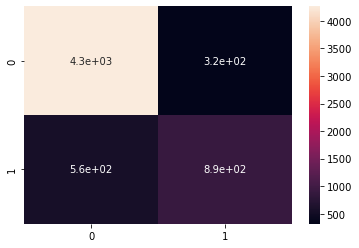

In [370]:
sns.heatmap(confusion_matrix(y1_test, y_rfbp_pred), annot = True)

threshold has been taken out in upper part, data was undersampled . got no time for sampling, so random forest has TP = 0